In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
result = data.groupby(['MaritalDesc', 'Sex']). agg(min_salary = ('Salary','min'), max_salary = ('Salary','max') ,median_salary= ('Salary','median'), average_salary= ('Salary','mean'))
data_agg = pd.DataFrame(result)
data_agg.head(10)

min_salary  max_salary  median_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069       68182        59393.0    57345.500000
            M         45115      148999        63738.5    72520.857143
Married     F         45433      250000        62662.0    69638.986111
            M         46120      157000        63370.5    70089.038462
Separated   F         52984       66149        60627.0    60658.888889
            M         64397       74417        70468.0    69760.666667
Single      F         45395      220450        62068.0    68988.266667
            M         46428      178000        63055.5    71340.048387
Widowed     F         45046      107226        63303.5    69719.750000
            M         52788       67176        61359.0    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
total_termination = data['TermReason'].value_counts()
data_total_termination = pd.DataFrame({'Total Termination': total_termination})
data_total_termination = pd.DataFrame({'TermReason': total_termination.index, 'total_termination': total_termination.values})
data_total_termination.head(5)

,TermReason,total_termination
0,N/A-StillEmployed,207
1,Another position,20
2,unhappy,14
3,more money,11
4,career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
filtered_data = data[data['PerfScoreID'] > 3]
source_counts = filtered_data['RecruitmentSource'].value_counts().reset_index()
source_counts.columns = ['RecruitmentSource', 'total_recruit']
sorted_source_counts = source_counts.sort_values(by='total_recruit', ascending=False)
sorted_source_counts.head(7)

,RecruitmentSource,total_recruit
0,Indeed,12
1,LinkedIn,9
2,Diversity Job Fair,6
3,Employee Referral,5
4,CareerBuilder,2
5,Google Search,2
6,Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
manager_count = data.groupby('Department',)['ManagerName'].nunique()
data_manager= pd.DataFrame({'Department': manager_count.index, 'ManagerName': manager_count.values})
data_manager.head(6)

,Department,ManagerName
0,Admin Offices,3
1,Executive Office,1
2,IT/IS,6
3,Production,10
4,Sales,4
5,Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
termination_ratio = data.groupby('Sex')['Termd'].value_counts(normalize=True)
print(termination_ratio)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: proportion, dtype: float64


# EDA and Data Visualization

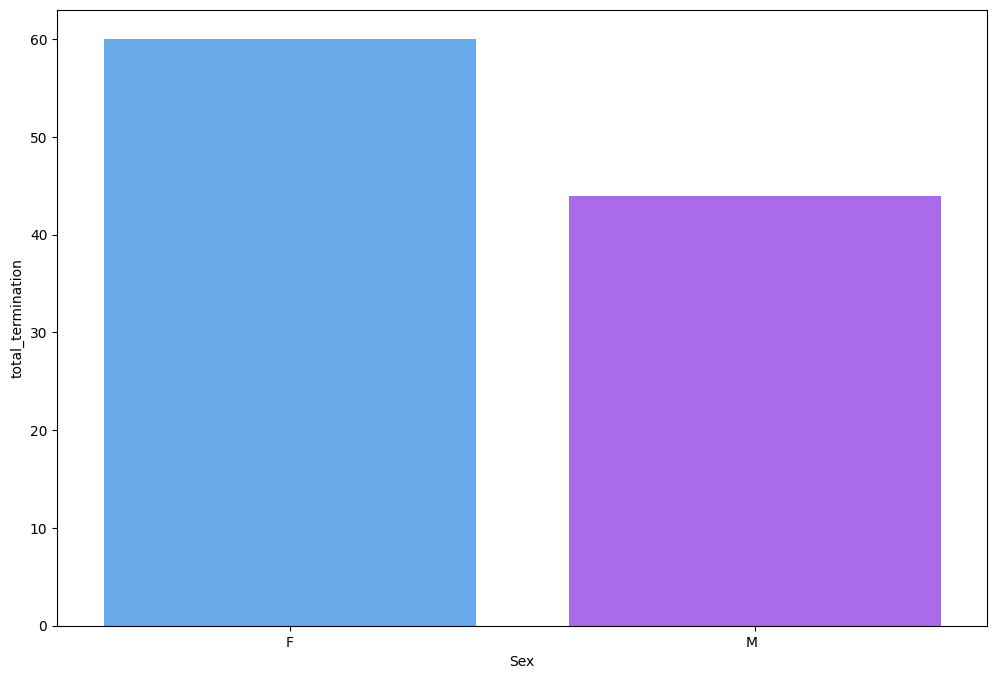

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

term = data.groupby(by=['Sex']).agg(total_termination=('Termd', 'sum')).reset_index()
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

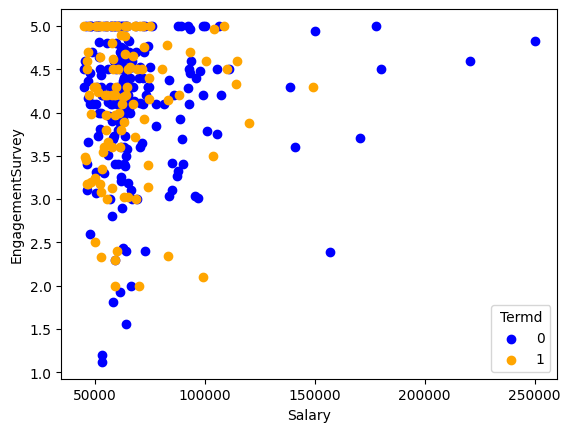

In [ ]:
plt.scatter(
    data[data['Termd'] == 0]['Salary'],
    data[data['Termd'] == 0]['EngagementSurvey'],
    c='blue',
    label='0',
)

plt.scatter(
    data[data['Termd'] == 1]['Salary'],
    data[data['Termd'] == 1]['EngagementSurvey'],
    c='orange',
    label='1',
)

plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title='Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

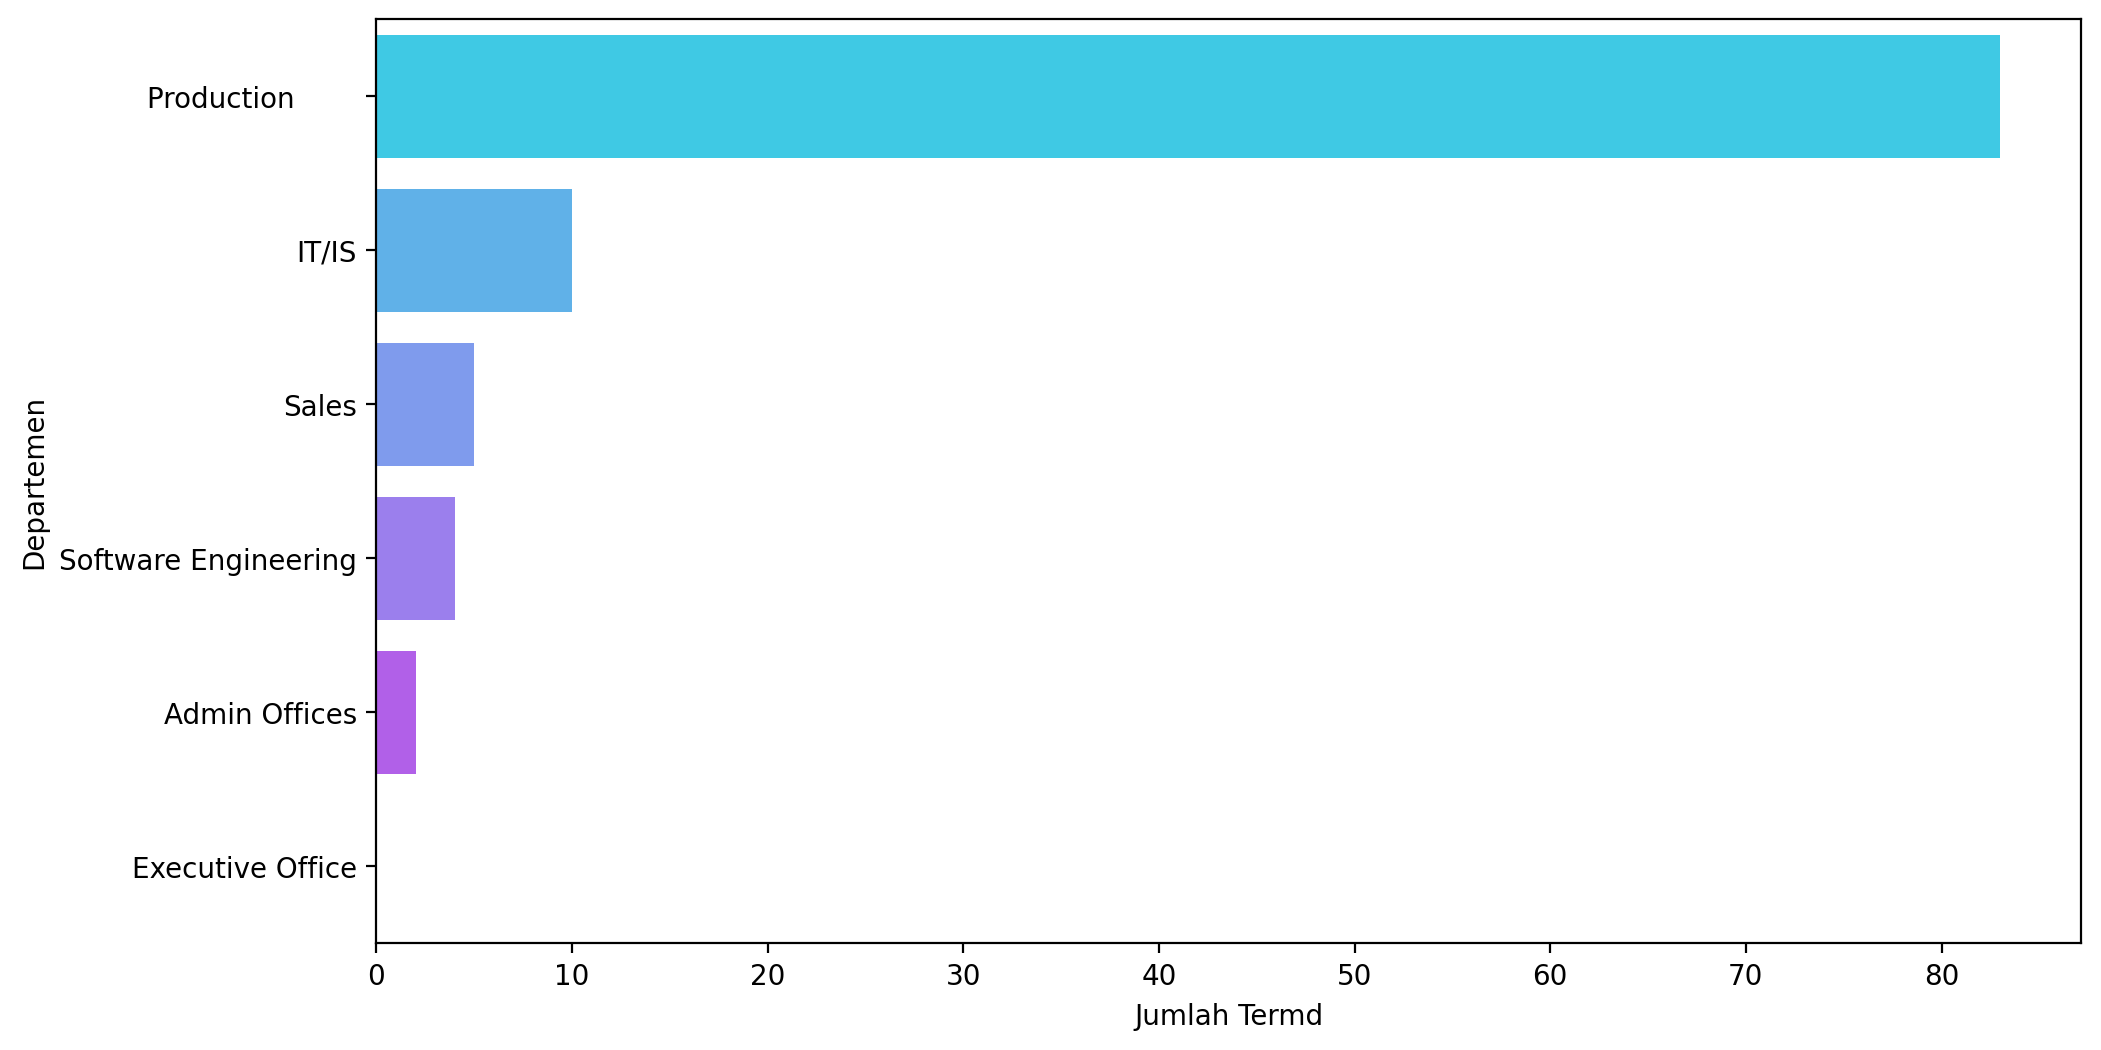

In [ ]:
termd_by_department = data.groupby('Department').agg(total_termination=('Termd','sum')).reset_index()
termd_by_department = termd_by_department.sort_values(by='total_termination', ascending=False)
plt.figure(figsize=(11, 6), dpi = 200)
sns.barplot(data=termd_by_department, x='total_termination', y='Department', hue='Department', palette='cool')

plt.xlabel('Jumlah Termd')
plt.ylabel('Departemen')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

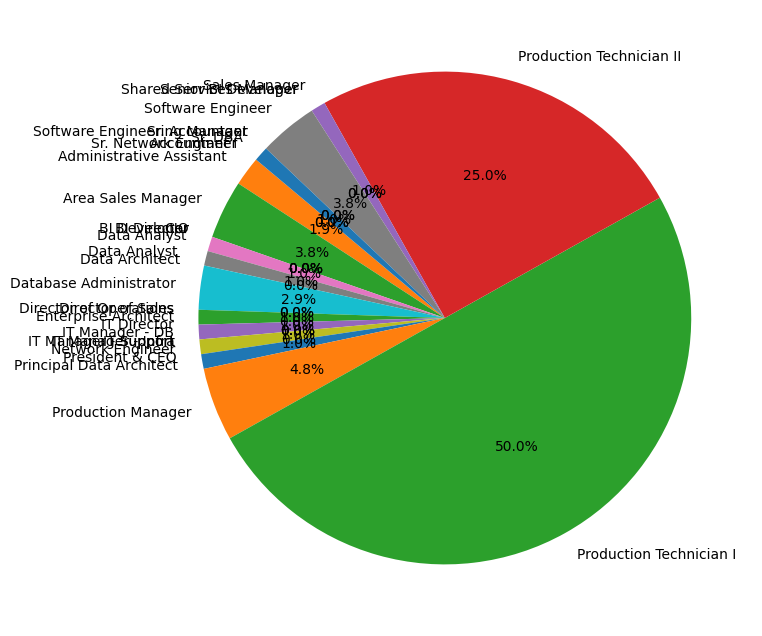

In [ ]:
termd_position = data.groupby('Position')['Termd'].sum()
plt.figure(figsize=(8, 8))
plt.pie(termd_position, labels=termd_position.index, autopct='%1.1f%%', startangle=140)
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

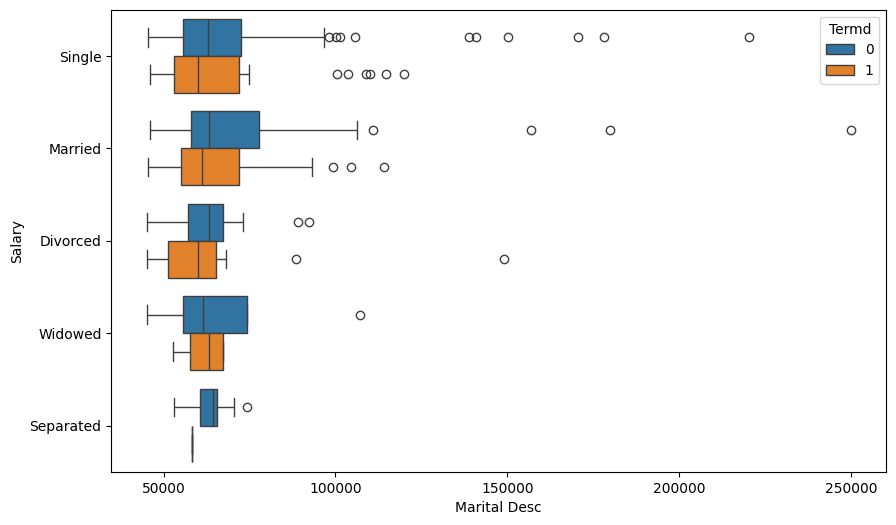

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Salary', y='MaritalDesc', hue='Termd',orient='horizontal')
plt.xlabel('Marital Desc')
plt.ylabel('Salary')
plt.legend(title='Termd', loc='upper right')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


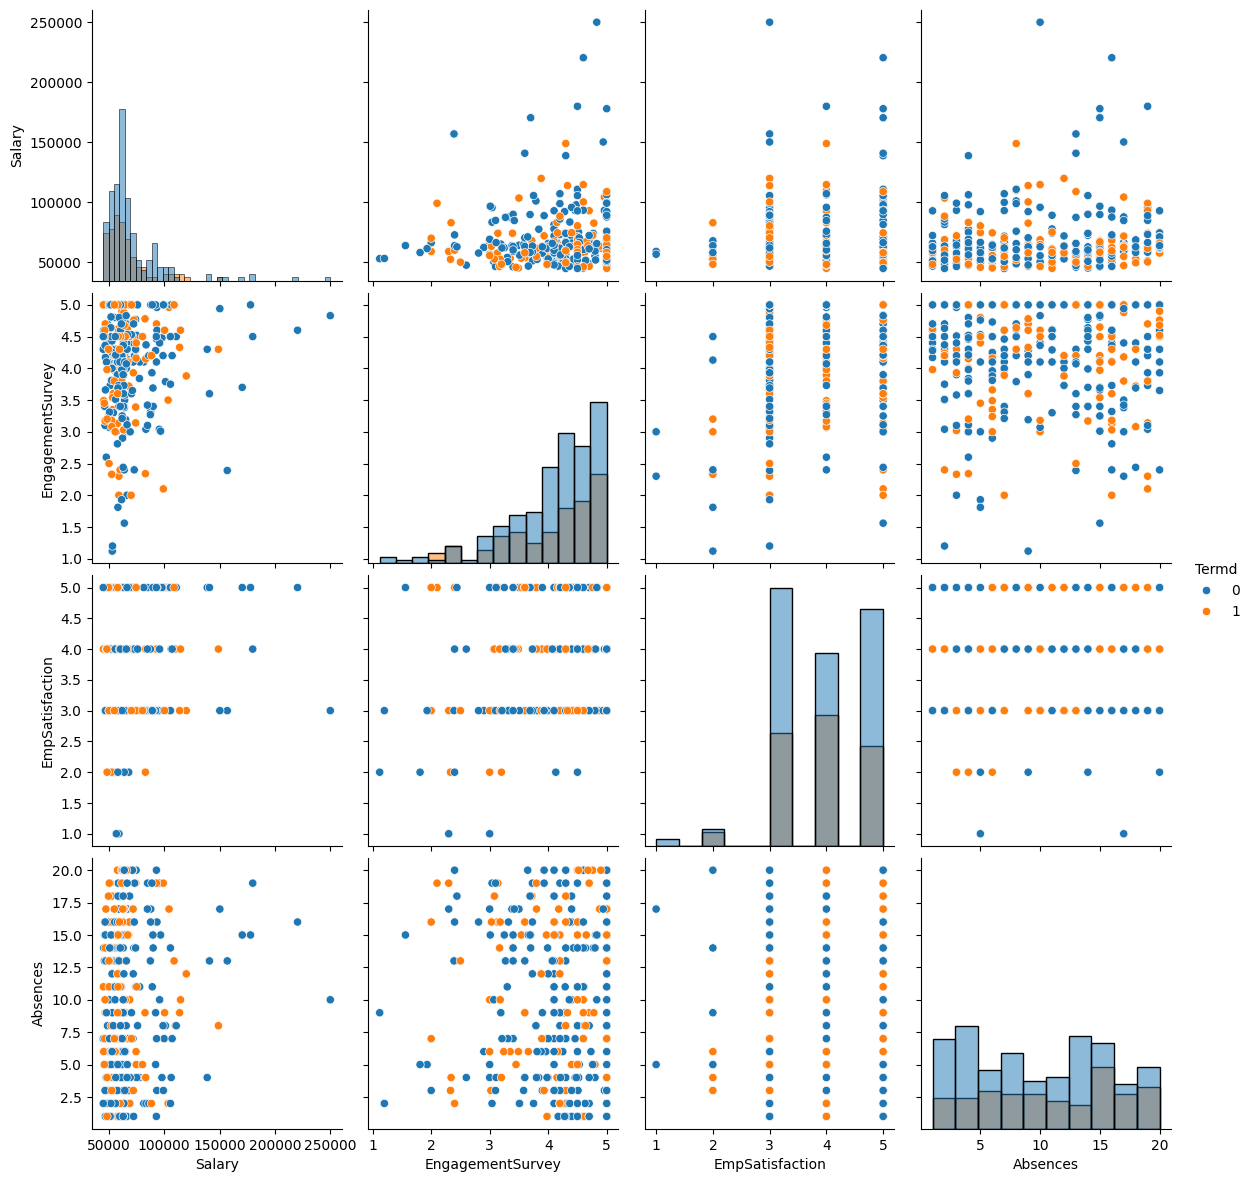

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data, vars = ['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Machine Learning Model

In [ ]:
data['DOB_date'] = pd.to_datetime(data['DOB'])
data['Age'] = 2022 - data['DOB_date'].dt.year
print(data[['DOB_date', 'Age']])


      DOB_date  Age
0   1983-07-10   39
1   1975-05-05   47
2   1988-09-19   34
3   1988-09-27   34
4   1989-09-08   33
..         ...  ...
306 1985-05-11   37
307 1982-05-04   40
308 1979-08-30   43
309 1979-02-24   43
310 1978-08-17   44

[311 rows x 2 columns]


<ipython-input-251-2766ff54564d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DOB_date'] = pd.to_datetime(data['DOB'])


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Salary_minmax']] = scaler.fit_transform(data[['Salary']])
print(data[['Salary', 'Salary_minmax']])

     Salary  Salary_minmax
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
for col in data.select_dtypes(include = 'object').columns :
  data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    category      
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [ ]:
jumlah_kosong = data.isna().sum()
print(jumlah_kosong)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
data['DateofTermination'] = data['DateofTermination'].cat.add_categories("00-00-00")
data['DateofTermination'].fillna("00-00-00", inplace=True)

<ipython-input-256-6fad1234a156>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DateofTermination'].fillna("00-00-00", inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_date,Age,Salary_minmax
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,00-00-00,N/A-StillEmployed,Active,Production,Michael Albert,22.0,5,0,4.60,5,0,1/17/2019,0,1,1983-07-10,39,0.085190
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,4,1,4.96,3,6,2/24/2016,0,17,1975-05-05,47,0.289777
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,5,1,3.02,3,0,5/15/2012,0,3,1988-09-19,34,0.097139
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,00-00-00,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,4,1,4.84,5,0,1/3/2019,0,15,1988-09-27,34,0.097315
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,3,1,5.00,4,0,2/1/2016,0,2,1989-09-08,33,0.028197


In [ ]:
selected_features = ['RecruitmentSource', 'PerformanceScore']
y = data['Termd']
x = data[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  train_size=0.8, random_state=0)

Random Forest Classifier:
Accuracy: 73.02%
Precision: 50.0%
Recall: 47.06%




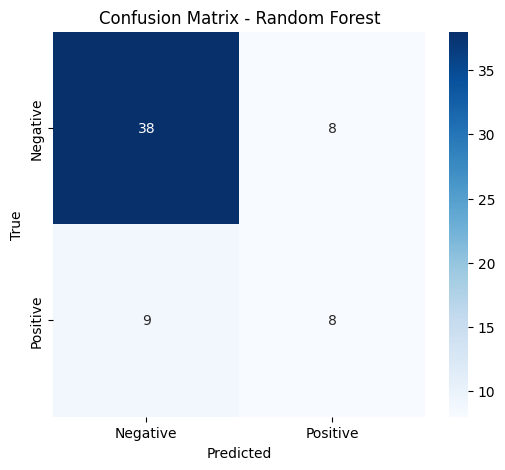

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Calculate accuracy, precision, and recall for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


# Calculate confusion matrix for RandomForestClassifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest Classifier:")
print(f"Accuracy: {round(accuracy_rf * 100, 2)}%")
print(f"Precision: {round(precision_rf * 100, 2)}%")
print(f"Recall: {round(recall_rf * 100, 2)}%")
print("\n")


# Plot Confusion Matrix for RandomForestClassifier
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


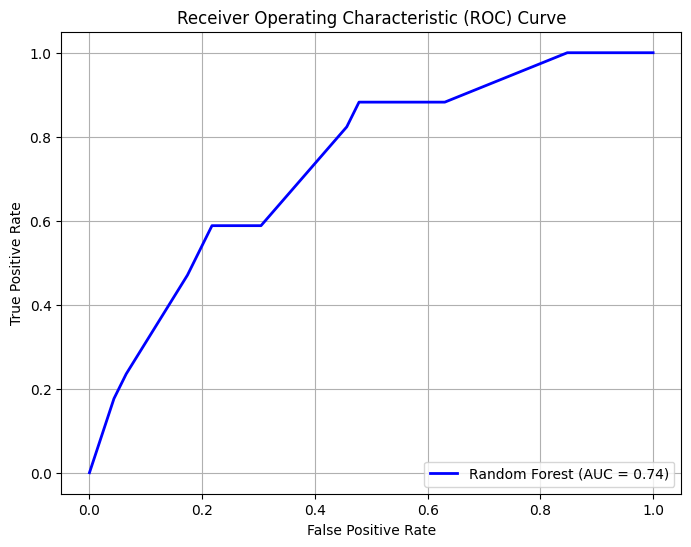

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Insight

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
yes
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>
website and on-line web application